In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ames-housing-dataset/AmesHousing.csv


In [2]:
df=pd.read_csv('/kaggle/input/ames-housing-dataset/AmesHousing.csv')
print(df.head())


   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [3]:
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.info())

(2930, 82)
Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr B

In [4]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
missing_cols = df.columns[df.isnull().any()]
print(missing_cols.tolist())

['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']


In [6]:
def handle_missing_values(df):
    """
    Handles missing values in the housing dataset:
    - Fills NA for categorical features indicating 'None'
    - Fills 0 for numeric features where missing implies absence
    - Uses median or mode for genuine missing values
    """
    # 1. Categorical features where missing means 'None'
    fill_none_cols = [
        'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
        'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu',
        'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Fence','Pool QC',
        'Misc Feature', 'Alley'
    ]
    df[fill_none_cols] = df[fill_none_cols].fillna('None')

    # 2. Numerical features where missing implies 0
    fill_zero_cols = [
        'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
        'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
        'Garage Cars', 'Garage Area'
    ]
    df[fill_zero_cols] = df[fill_zero_cols].fillna(0)

    # 3. Fill with median (continuous numeric)
    df['Lot Frontage']=df['Lot Frontage'].fillna(df['Lot Frontage'].median())
    df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].median())

    # 4. Fill with mode (categorical)
    df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

    return df


In [7]:
handle_missing_values(df)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,None,IR1,Lvl,...,0,None,None,None,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,None,Reg,Lvl,...,0,None,MnPrv,None,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,None,IR1,Lvl,...,0,None,None,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,None,Reg,Lvl,...,0,None,None,None,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,None,IR1,Lvl,...,0,None,MnPrv,None,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,None,IR1,Lvl,...,0,None,GdPrv,None,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,68.0,8885,Pave,None,IR1,Low,...,0,None,MnPrv,None,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,None,Reg,Lvl,...,0,None,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,None,Reg,Lvl,...,0,None,None,None,0,4,2006,WD,Normal,170000


In [8]:
df.isnull().sum().sort_values(ascending=False).head(15)

Order             0
Garage Finish     0
Garage Type       0
Fireplace Qu      0
Fireplaces        0
Functional        0
TotRms AbvGrd     0
Kitchen Qual      0
Kitchen AbvGr     0
Bedroom AbvGr     0
Half Bath         0
Full Bath         0
Bsmt Half Bath    0
Bsmt Full Bath    0
Gr Liv Area       0
dtype: int64

In [9]:
def encode_features(df):
    """
    Encodes categorical variables:
    - Applies ordinal mapping to quality-related features
    - Applies one-hot encoding to nominal categorical features
    """
    # 1. Ordinal features with logical ranks
    quality_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
    ordinal_cols = [
        'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond',
        'Heating QC', 'Kitchen Qual', 'Fireplace Qu',
        'Garage Qual', 'Garage Cond', 'Pool QC'
    ]
    for col in ordinal_cols:
        if col in df.columns:
            df[col] = df[col].map(quality_map)

    # 2. One-hot encoding for nominal features
    nominal_cols = [
        'MS Zoning', 'Street', 'Neighborhood', 'Condition 1', 'Condition 2',
        'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
        'Exterior 1st', 'Exterior 2nd', 'Heating', 'Electrical',
        'Functional', 'Garage Type', 'Garage Finish', 'Paved Drive',
        'Sale Type', 'Sale Condition', 'Foundation', 'Lot Config',
        'Land Slope', 'Land Contour', 'Lot Shape', 'Misc Feature',
        'Fence', 'Alley', 'Mas Vnr Type', 'Bsmt Exposure',
        'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air', 'Utilities'
    ]
    df = pd.get_dummies(df, columns=[col for col in nominal_cols if col in df.columns], drop_first=True)

    return df


In [10]:
df = encode_features(df)


In [11]:
print(df.select_dtypes(include='object').columns)  # Should be empty
print(df.isnull().sum().sum())                     # Should be 0


Index([], dtype='object')
0


In [12]:
df = encode_features(df)


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr(numeric_only = True)
print('SalePrice' in corr_matrix.columns)

True


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


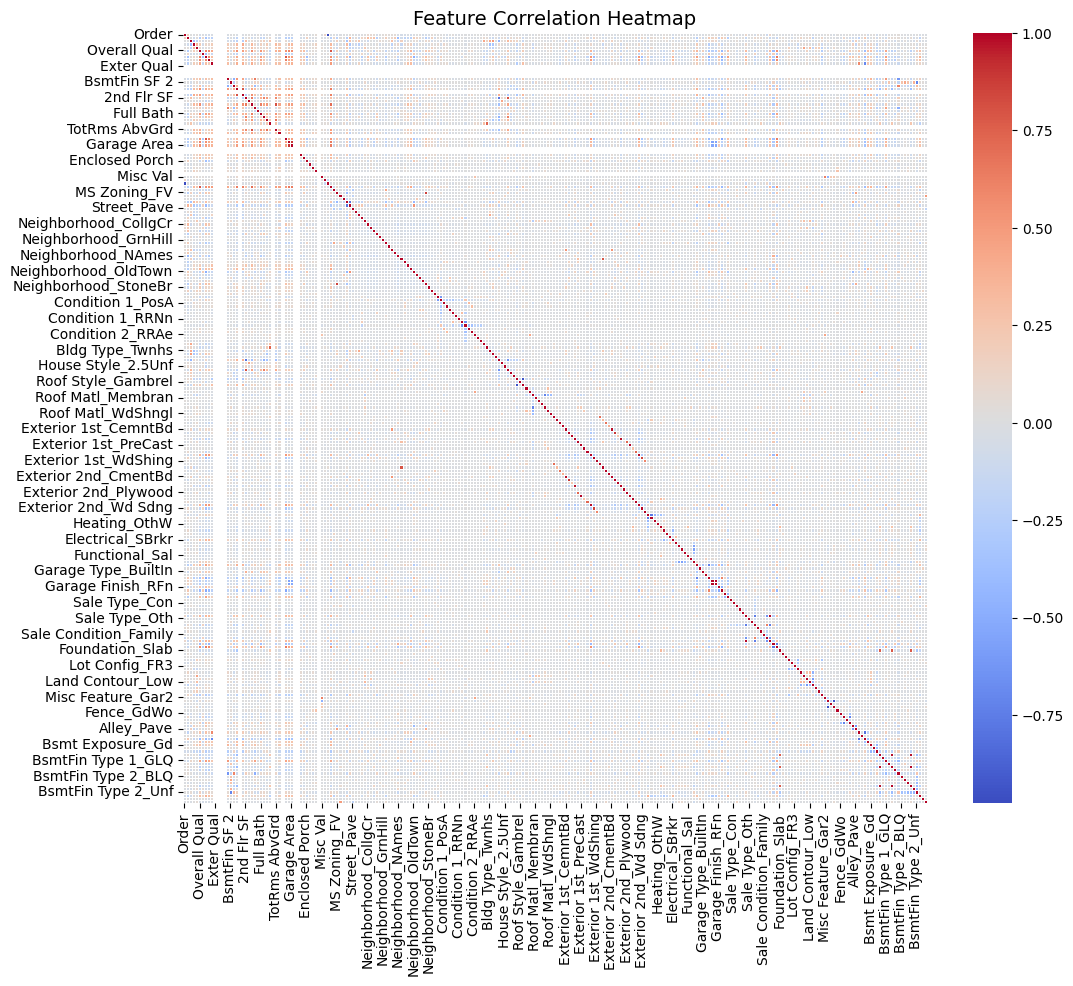

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,
           cmap='coolwarm',
           annot = False,fmt = '.2f',linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize = 14)
plt.show()

In [15]:
print('SalePrice' in df.columns)
print(df['SalePrice'].dtype)

True
int64


In [16]:
top_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(10).index.tolist()
print(top_features)


['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath', 'Year Remod/Add']


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[top_features].drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Baseline MSE: {mse:.2f}")


Baseline MSE: 1544649481.87
